# This is assignment11

# Name:PENG CIYUAN 

# Student ID:2018220161 

# Link：https://github.com/pcyyyy/assignment11.git

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure

file_image	= 'cau.jpg'

im_color 	= io.imread(file_image)
im_gray  	= color.rgb2gray(im_color)
im          = (im_gray - np.mean(im_gray)) / np.std(im_gray)
(row, col)  = im.shape

noise_std   = 0.2 # try with varying noise standard deviation
noise       = np.random.normal(0, noise_std, (row, col))
im_noise    = im + noise

# obtain the reconstructed (denoised) images with varying degrees of regularization 

im_recon    = im # this must be replaced with the reconstructed (denoised) image 
noise_recon = im_noise - im_recon
error       = np.linalg.norm(im - im_recon)



# Define leastsquare approximation function

In [2]:
def leastsquare(X,Y) :
    xTx= np.dot(X.T,X)
    x=np.dot(np.linalg.inv(xTx),X.T)
    R=np.dot(x,Y)
    return (R)

# Define function to get A

In [3]:
def weight(n,row,col):
    
  
    Dx=np.zeros((row*(col-1),row*(col)))
    for i in range(row*(col-1)):
        Dx[i][i]=-1
        Dx[i][i+row]=1
    
    
    Dy=np.zeros((row*(col-1),row*(col)))
    k=0
    for i in range(row*(col-1)):
        if(i%(col-1)==0 and k>0):
            k+=1
        Dy[i][k]=-1
        Dy[i][k+1]=1
        k+=1
    
    I= np.identity(row*col)
    

    sqrtla= n**(1/2.0)
    

    A=np.concatenate((I,sqrtla*Dx, sqrtla*Dy), axis=0)
    
    return(A)

# Reconstructing images

In [4]:
# lambda
r1 = 10**(-3)
r2 = 10**(-6)
r3 = 10**(-9)
A1=weight(r1,row,col)
A2=weight(r2,row,col)
A3 = weight(r3,row,col)
# vectorization !
im_noise.shape
vec_im_noise= im_noise.flatten()
vec_im_noise.shape

zero_array=np.zeros(row*(col-1)*2)
b=np.concatenate((vec_im_noise,zero_array), axis=0)

v1=leastsquare(A1,b)
v2=leastsquare(A2,b)
v3=leastsquare(A3,b)
im_recon1= v1.reshape(68,100)
im_recon2= v2.reshape(68,100)
im_recon3= v3.reshape(68,100)

# Plotting reconstruction images

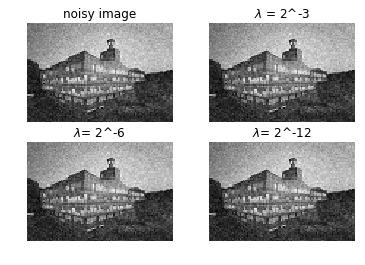

In [5]:
p1 = plt.subplot(2,2,1)
p1.set_title('noisy image')
plt.imshow(im_noise, cmap='gray')
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('$\lambda$ = 2^-3')
plt.imshow(im_recon1, cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('$\lambda$= 2^-6')
plt.imshow(im_recon2, cmap='gray')
plt.axis('off')

p4 = plt.subplot(2,2,4)
p4.set_title('$\lambda$= 2^-12')
plt.imshow(im_recon3, cmap='gray')
plt.axis('off')

plt.show()

# getting reconstruction error

In [6]:
error1= np.linalg.norm(im - im_recon1)
error2= np.linalg.norm(im - im_recon2)
error3= np.linalg.norm(im - im_recon3)
print(error1)
print(error2)
print(error3)

16.186850280677994
16.250340765600555
16.250405399622085
